# Importing Libraries

In [276]:
#Manipulating Datasets
import pandas as pd
#Visual Representation of Data
import matplotlib.pyplot as plt
import seaborn as sns
#For Numerical Calculations
import numpy as np
#For Encoding Strings Into Numerical
from sklearn import preprocessing
#For Decision Tree Algorithm
from sklearn import tree
#For Splitting Data into Test and Train
from sklearn.model_selection import train_test_split

# Data Manipulation

### Data Collection

#### Importing Data

In [277]:
Data_Source=pd.read_csv('D:\Temporary\Data Files\weatherAUS.csv')

### Data Cleaning

#### Cheking Missing Values

In [278]:
#Total Missing Values in Each Attribute
Mis_Val_Total=Data_Source.isnull().sum().sort_values(ascending=False)
#Percent Contribution of Missing Data by Each Attribute
Mis_Val_Percent=(Data_Source.isnull().sum()/Data_Source.isnull().count()).sort_values(ascending=False)
#Tabular Representation of Total and Percent Missing Data
Missing_Data=pd.concat([Mis_Val_Total, Mis_Val_Percent], axis=1, keys=['Total','Percent'])

#### Removing Some attributes  

In [279]:
#Removing Attributes that contribute more than 10% of Missing Values
Data_Source=Data_Source.drop((Missing_Data[Missing_Data['Percent']>0.10]).index,1)

C:\Users\Aura Tech\AppData\Local\Temp\ipykernel_12076\4133106782.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Data_Source=Data_Source.drop((Missing_Data[Missing_Data['Percent']>0.10]).index,1)


#### Dropping Records with NaN Values

In [280]:
Data_Source_2=Data_Source.dropna()

#### Encoding Strings into Integers

In [281]:
encode=preprocessing.LabelEncoder()
Data_Source_2['RainToday'] = encode.fit_transform(Data_Source_2.RainToday.values)
Data_Source_2['RainTomorrow']=encode.fit_transform(Data_Source_2.RainTomorrow.values)
Data_Source_2['WindDir3pm']=encode.fit_transform(Data_Source_2.WindDir3pm.values)
Data_Source_2['WindDir9am']=encode.fit_transform(Data_Source_2.WindDir9am.values)
Data_Source_2['WindGustDir']=encode.fit_transform(Data_Source_2.WindGustDir.values)

C:\Users\Aura Tech\AppData\Local\Temp\ipykernel_12076\1329695944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Source_2['RainToday'] = encode.fit_transform(Data_Source_2.RainToday.values)
C:\Users\Aura Tech\AppData\Local\Temp\ipykernel_12076\1329695944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Source_2['RainTomorrow']=encode.fit_transform(Data_Source_2.RainTomorrow.values)
C:\Users\Aura Tech\AppData\Local\Temp\ipykernel_12076\1329695944.py:4: SettingWithCopyWarning: 
A value is try

#### Data Visualisation - HeatMap

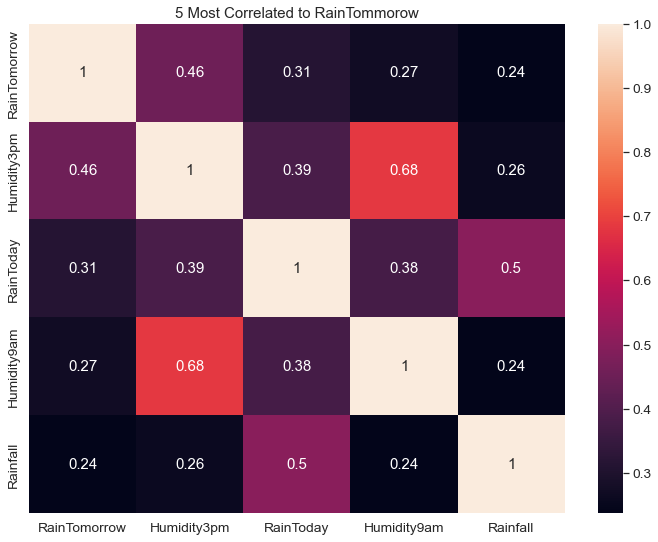

In [282]:
#5 Most Correlated to Rain Tommorrow
corrmat=Data_Source_2.corr()
f, ax =plt.subplots(figsize=(12,9))
Var_Num = 5
cols = corrmat.nlargest(Var_Num, 'RainTomorrow')['RainTomorrow'].index
cm=np.corrcoef(Data_Source_2[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm, annot=True, cbar=True, yticklabels=cols.values, xticklabels=cols.values)
ax.set_title('5 Most Correlated to RainTommorow')
plt.show()

## Modeling 

### Decision_Tree_Model

In [283]:
Decision_tree_Model=tree.DecisionTreeClassifier()

### Specifying Attributes into Outcomes and Predictors

In [284]:
#Specifying Outcome (Y)
Label =Data_Source_2["RainTomorrow"]

#Specifying Predictors(X)
Feature=Data_Source_2[['Humidity9am','Humidity3pm','Rainfall','RainToday']]

### Splitting Data into Test and Train Sample

In [285]:
x_train, x_test, y_train, y_test = train_test_split(Feature, Label, test_size=0.4, random_state=0)

### Model Training

In [286]:
#Fixing in train datasets
Decision_tree_Model.fit(x_train, y_train)

DecisionTreeClassifier()

### Model Accuracy Test

In [313]:
#Using Score Prediction
Decision_tree_Model.score(Feature, Label)

0.8713687494868215

### Model Prediction Test

In [315]:
#Entering Test Values
Test_Values=pd.DataFrame(Decision_tree_Model.predict(x_test))

In [316]:
#Displaying Result
Test_Values

,0
0,1
1,0
2,0
3,0
4,0
...,...
48711,0
48712,0
48713,0
48714,0
